In [1]:
import numpy as np
import random
import pandas as pd

In [2]:
positives = ['R','K']
hydrophobes = ['A','I','L','M','F','W','Y','V']
uncharged = ['S','T','N','Q','A','V','I','L','M','F','Y','W']
aas = [a for a in 'ARNDCEQGHILKMFPSTWYV']

In [3]:
# N Region
def get_n():
    # pick length of n region
    n_length = np.random.randint(low=1, high=6)
    # random select number of positives (2-3)

    if n_length > 1:
        num_positives = np.random.randint(low=1,high=n_length)
    else:
        num_positives = 1

    n = ''
    for i in range(num_positives):
        n += np.random.choice(positives)
    while len(n) < n_length:
        n += np.random.choice(aas)

    n = ''.join(random.sample(n, len(n)))
#     print(n_length, num_positives, n)
    return n

In [4]:
# H Region
def get_h():
    h_length = np.random.randint(low=7, high=15)
    h = [np.random.choice(hydrophobes) for i in range(h_length)]
    h = ''.join(random.sample(h, len(h)))
    return h

In [5]:
# C Region
def get_c():
    c_length = np.random.randint(low=0, high=4)
    c = "".join([np.random.choice(uncharged) for i in range(c_length)])

    X = np.random.choice(aas)
    while X in ['C','P','A']:
        X = np.random.choice(aas)
    end_motif = 'A' + X + 'A'

    c = c + end_motif
    return(c)

In [6]:
enz_df = pd.read_excel('initial_enzymes_1.xlsx')
enzymes = enz_df['Protein-met-sigp'].values

In [7]:
start_num = 0

random.seed(2+start_num)
np.random.seed(2+start_num)

# with open(f'heuristic_generation_dos.txt','a') as f:
#     for i in range(1000):
#         name = f'>heuristic{i+1:004}'
#         seq = 'M' + get_n() + get_h() + get_c() + random.choice(enzymes)
#         print(name)
#         print(seq)
#         f.write(name + "\n")
#         f.write(seq + "\n")
        

In [8]:
import glob

files = glob.glob('signalp/*.txt')
files

['signalp/output_protein_type-3.txt',
 'signalp/output_protein_type-2.txt',
 'signalp/output_protein_type-4.txt']

In [9]:
sp_df = pd.DataFrame()
for fname in files:
    _df = pd.read_csv(fname, sep="\t", header=1)
    sp_df = sp_df.append(_df, sort=False)

In [10]:
sp_df['func_prob'] = 1 - sp_df['OTHER']

In [20]:
sp_df.sort_values(by='# ID')

,# ID,Prediction,SP(Sec/SPI),TAT(Tat/SPI),LIPO(Sec/SPII),OTHER,CS Position,func_prob,class
0,heuristic001,SP(Sec/SPI),0.965828,0.000683,0.030798,0.002691,CS pos: 20-21. AEA-FP. Pr: 0.5511,0.997309,heuristic
1,heuristic002,SP(Sec/SPI),0.515061,0.009637,0.111317,0.363985,CS pos: 23-24. ATA-HH. Pr: 0.3148,0.636015,heuristic
2,heuristic003,SP(Sec/SPI),0.765617,0.012095,0.036703,0.185585,CS pos: 30-31. VRR-EV. Pr: 0.1866,0.814415,heuristic
3,heuristic004,SP(Sec/SPI),0.930688,0.003412,0.060290,0.005609,CS pos: 25-26. SRA-ND. Pr: 0.8597,0.994391,heuristic
4,heuristic005,OTHER,0.303908,0.003067,0.238672,0.454354,NaN,0.545646,heuristic
...,...,...,...,...,...,...,...,...,...
251,heuristic764,LIPO(Sec/SPII),0.335144,0.038165,0.512829,0.113862,CS pos: 24-25. MAA-GA. Pr: 0.1626,0.886138,heuristic
252,heuristic765,SP(Sec/SPI),0.675992,0.005224,0.016385,0.302399,CS pos: 24-25. AEA-DG. Pr: 0.5481,0.697601,heuristic
253,heuristic766,SP(Sec/SPI),0.921974,0.003177,0.015597,0.059252,CS pos: 22-23. ANA-DV. Pr: 0.8199,0.940748,heuristic
254,heuristic767,SP(Sec/SPI),0.593060,0.003552,0.026227,0.377161,CS pos: 23-24. ANA-AD. Pr: 0.5250,0.622839,heuristic


In [12]:
%matplotlib inline
import seaborn as sns

In [13]:
vals = sp_df['func_prob'].values
print(np.average(vals), np.std(vals))

0.7084829999999999 0.25290618181523755


In [14]:
import pickle
with open('gen_probs.p', 'rb') as f:
    gen_probs = pickle.load(f)
    
gen_df = pd.DataFrame(data=gen_probs, columns=['func_prob'])
gen_df

,func_prob
0,0.926471
1,0.968954
2,0.174703
3,0.998907
4,0.905729
...,...
159,0.995390
160,0.018027
161,0.647605
162,0.999049


In [15]:
sp_df['class'] = 'heuristic generated'
gen_df['class'] = 'transformer generated'
plot_df = sp_df.append(gen_df)

In [16]:
import matplotlib.pyplot as plt

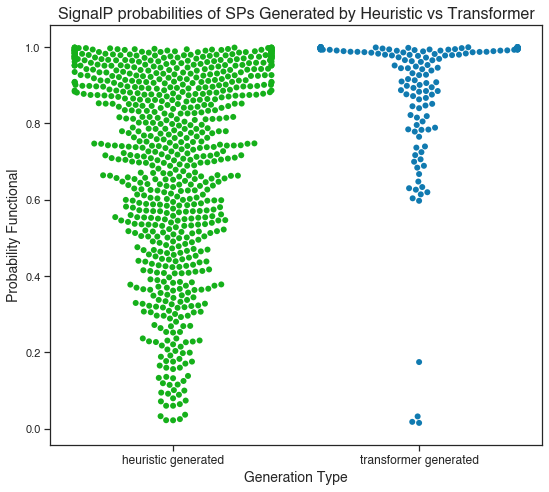

In [17]:
sns.set(font='helvetica', context='notebook', font_scale=1, style='ticks')
f = plt.figure(figsize=(8,7))
color_palette_dict = {'heuristic generated':sns.xkcd_rgb["green"], 
                      'transformer generated':sns.xkcd_rgb["nice blue"]} 
#                       'Incorrect Construct':sns.xkcd_rgb["black"], 
#                       'NonFunc Construct':sns.xkcd_rgb["steel grey"]}
chart = sns.swarmplot(x="class", y="func_prob", hue='class', data=plot_df, palette=color_palette_dict, size=6) #

title = "SignalP probabilities of SPs Generated by Heuristic vs Transformer"

plt.xlabel('Generation Type', fontsize=14)
plt.ylabel('Probability Functional', fontsize=14)
plt.title(title, fontsize=16)
#         chart.set_title(title)
chart.set_xticklabels(
        chart.get_xticklabels(), 
        fontweight='light',
        fontsize='medium')

plt.tight_layout()
# plt.legend().set_title('Classification')
plt.legend().set_visible(False)
display(chart)

f.savefig('heuristic_plot.png', dpi=300)

In [18]:
from scipy.stats import ttest_ind
# ttest_ind?
ttest_ind(sp_df['func_prob'].values, gen_probs, equal_var=False)

Ttest_indResult(statistic=-12.053132375693616, pvalue=5.021643475856889e-28)

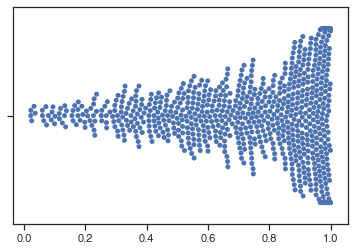

In [19]:
sp_df['class'] = 'heuristic'

sns.swarmplot(sp_df['func_prob'].values)

In [31]:
ids = []
seqs = []
# Convert to csv for supplemental
with open('heuristic_generation_512.txt', 'r') as f:
    for i,line in enumerate(f):
        if i % 2 == 0:
            ids.append(line.strip()[1:])
        else:
            seqs.append(line.strip())
            
with open('heuristic_generation.txt', 'r') as f:
    for i,line in enumerate(f):
        if i % 2 == 0:
            ids.append(line.strip()[1:])
        else:
            seqs.append(line.strip())

supp_df = pd.DataFrame({'ids':ids, 'seqs':seqs})
supp_df = supp_df.sort_values(by='ids')
supp_df.to_csv('fasta_seqs.csv')

,ids,seqs
0,heuristic513,MMRAVLFIALALAYAATGSGYTATKYPIVLAHGMLGFDSLLGIDYW...
1,heuristic514,MPKAFMVFMMVIWMYLQIAYAAQDFRARAPEDEVIYFVLPDRFENG...
2,heuristic515,MIKKRYFIMYMFAAANAAFDALFARDVALPLAAAAYSVLGGSPAVL...
3,heuristic516,MGKTSVLLFLIFYMWAVAETANKSNELTAPSIKSGTILHAWNWSFN...
4,heuristic517,MRHKAKFFMAAMLYYAWTAARAASTDYWQNWTDGGGIVNAVNGSGG...
...,...,...
763,heuristic508,MRWVIWIFMYIYVVMFNASAQADVLRTPDERFEGLADWSFAPHYTE...
764,heuristic509,MRMGIMYVFWWWIASAASTDYWQNWTDGGGIVNAVNGSGGNYSVNW...
765,heuristic510,MRFKKRFWYLLWLMFVLTAIATELILDFNKVQMRSQQLAPGVYAHL...
766,heuristic511,MKIRMIVALIYWYMADASPNPTNIHTGKTLRLLYHPASQPCRSAHQ...


In [33]:
len(set(supp_df['seqs'].values))

768